### Importing the libraries

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import OneHotEncoder,StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer

from sklearn.svm import SVR

### Importing the dataset

In [2]:
df = pd.read_csv('Position_Salaries.csv')

df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


### Split the data

In [3]:
X = df.iloc[:,1:-1].values

y = df.iloc[:,-1].values

In [4]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [5]:
y = y.reshape(len(y),1)

y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

### Transforming Dependent variable y to same scale using Feature Scaling

In [6]:
ss_x = StandardScaler()

X = ss_x.fit_transform(X)

X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [7]:
ss_y = StandardScaler()

y = ss_y.fit_transform(y)

y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

### Fit the independent and dependent variables on the model

In [8]:
svr = SVR(kernel='rbf')

svr.fit(X,y)

/home/ankurkaul/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

### Predicting the new value of experience

In [10]:
ss_y.inverse_transform(svr.predict(ss_x.transform([[6.5]])))

array([170370.0204065])

### Visualizing data with low resolution

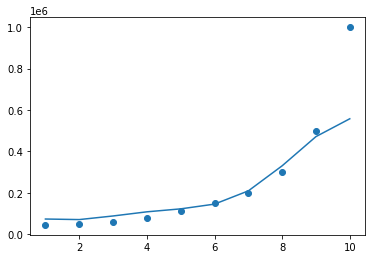

In [17]:
plt.scatter(ss_x.inverse_transform(X),ss_y.inverse_transform(y))

plt.plot(ss_x.inverse_transform(X),ss_y.inverse_transform(svr.predict(X)))

plt.show()

### Visualizing data with high resolution

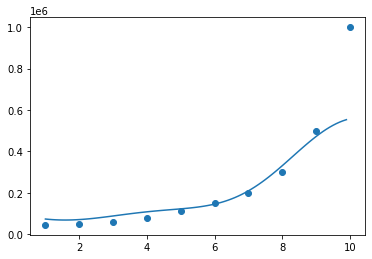

In [31]:
x_grid = np.arange(min(ss_x.inverse_transform(X)),max(ss_x.inverse_transform(X)),0.1)

x_grid = x_grid.reshape(len(x_grid),1)

plt.scatter(ss_x.inverse_transform(X),ss_y.inverse_transform(y))

plt.plot(x_grid,ss_y.inverse_transform(svr.predict(ss_x.transform(x_grid))))

plt.show()